1.13.1
Number of training examples : 60000
Number of testing examples :  10000


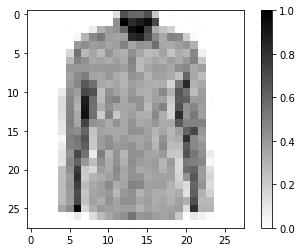

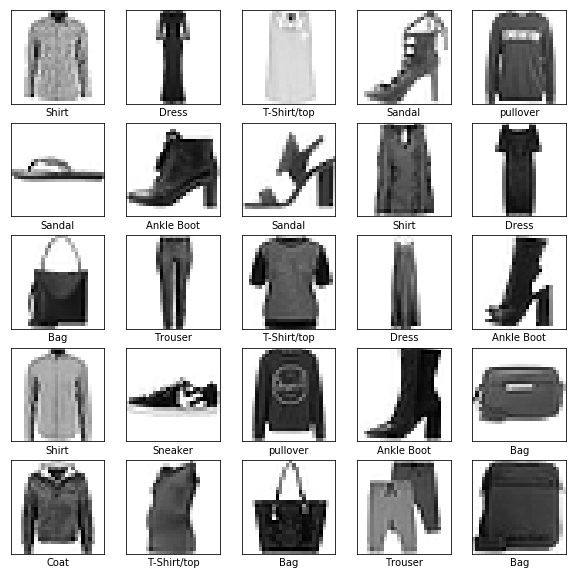

In [10]:
from  __future__ import absolute_import,division,print_function,unicode_literals

import tensorflow as tf
import tensorflow_datasets as tfds
tf.logging.set_verbosity(tf.logging.ERROR)

import math
import numpy as np
import matplotlib.pyplot as plt

import tqdm
import tqdm.auto
tqdm.tqdm=tqdm.auto.tqdm

print(tf.__version__)
tf.enable_eager_execution()

dataset,metadata = tfds.load('fashion_mnist',as_supervised=True,with_info=True)
train_dataset,test_dataset = dataset['train'],dataset['test']


class_names=['T-Shirt/top','Trouser','pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']


num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples
print("Number of training examples : {}".format(num_train_examples))
print("Number of testing examples :  {}".format(num_test_examples))

def normalize(images,labels):
    images=tf.cast(images,tf.float32)
    images /= 255
    return images , labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

for images,label in test_dataset.take(1):
    break
images=images.numpy().reshape((28,28))

plt.figure()
plt.imshow(images,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

plt.figure(figsize=(10,10))
i=0
for (images,label) in test_dataset.take(25):
    images=images.numpy().reshape((28,28))
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images,cmap=plt.cm.binary)
    plt.xlabel(class_names[label])
    i=i+1
plt.show()
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax),
])

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
BATCH_SIZE=32
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.batch(BATCH_SIZE)

In [11]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Epoch 1/5


 744/1875 [==========>...................] - ETA: 9:11:33 - loss: 2.5507 - acc: 0.03 - ETA: 1:50:25 - loss: 2.1783 - acc: 0.16 - ETA: 1:01:26 - loss: 1.8717 - acc: 0.38 - ETA: 39:31 - loss: 1.6245 - acc: 0.4955 - ETA: 29:10 - loss: 1.4728 - acc: 0.53 - ETA: 23:06 - loss: 1.3904 - acc: 0.54 - ETA: 19:49 - loss: 1.3065 - acc: 0.57 - ETA: 17:21 - loss: 1.2535 - acc: 0.59 - ETA: 15:01 - loss: 1.2107 - acc: 0.60 - ETA: 13:34 - loss: 1.1784 - acc: 0.60 - ETA: 12:06 - loss: 1.1430 - acc: 0.61 - ETA: 10:55 - loss: 1.1013 - acc: 0.63 - ETA: 9:56 - loss: 1.0782 - acc: 0.6423 - ETA: 9:07 - loss: 1.0494 - acc: 0.647 - ETA: 8:34 - loss: 1.0269 - acc: 0.654 - ETA: 8:05 - loss: 1.0048 - acc: 0.660 - ETA: 7:39 - loss: 0.9850 - acc: 0.664 - ETA: 7:15 - loss: 0.9653 - acc: 0.672 - ETA: 7:00 - loss: 0.9496 - acc: 0.677 - ETA: 6:35 - loss: 0.9361 - acc: 0.682 - ETA: 6:13 - loss: 0.9279 - acc: 0.682 - ETA: 5:53 - loss: 0.9136 - acc: 0.685 - ETA: 5:39 - loss: 0.8999 - acc: 0.690 - ETA: 5:26 - loss: 0.8881 -

1875/1875 [==============================] - ETA: 7s - loss: 0.5060 - acc: 0.821 - ETA: 7s - loss: 0.5056 - acc: 0.821 - ETA: 6s - loss: 0.5050 - acc: 0.821 - ETA: 6s - loss: 0.5048 - acc: 0.821 - ETA: 6s - loss: 0.5049 - acc: 0.821 - ETA: 6s - loss: 0.5046 - acc: 0.821 - ETA: 6s - loss: 0.5044 - acc: 0.821 - ETA: 6s - loss: 0.5041 - acc: 0.821 - ETA: 6s - loss: 0.5042 - acc: 0.821 - ETA: 5s - loss: 0.5040 - acc: 0.821 - ETA: 5s - loss: 0.5037 - acc: 0.821 - ETA: 5s - loss: 0.5033 - acc: 0.822 - ETA: 5s - loss: 0.5031 - acc: 0.822 - ETA: 5s - loss: 0.5028 - acc: 0.822 - ETA: 5s - loss: 0.5028 - acc: 0.822 - ETA: 5s - loss: 0.5025 - acc: 0.822 - ETA: 5s - loss: 0.5021 - acc: 0.822 - ETA: 5s - loss: 0.5019 - acc: 0.822 - ETA: 4s - loss: 0.5015 - acc: 0.822 - ETA: 4s - loss: 0.5013 - acc: 0.822 - ETA: 4s - loss: 0.5008 - acc: 0.822 - ETA: 4s - loss: 0.5009 - acc: 0.822 - ETA: 4s - loss: 0.5007 - acc: 0.822 - ETA: 4s - loss: 0.5001 - acc: 0.823 - ETA: 4s - loss: 0.4997 - acc: 0.823 - ETA: 

 903/1875 [=============>................] - ETA: 4:21 - loss: 0.3366 - acc: 0.906 - ETA: 1:11 - loss: 0.3149 - acc: 0.887 - ETA: 45s - loss: 0.3034 - acc: 0.887 - ETA: 43s - loss: 0.3370 - acc: 0.87 - ETA: 37s - loss: 0.3615 - acc: 0.86 - ETA: 33s - loss: 0.3741 - acc: 0.86 - ETA: 31s - loss: 0.3741 - acc: 0.86 - ETA: 31s - loss: 0.3815 - acc: 0.86 - ETA: 29s - loss: 0.3858 - acc: 0.86 - ETA: 29s - loss: 0.3721 - acc: 0.86 - ETA: 29s - loss: 0.3686 - acc: 0.86 - ETA: 30s - loss: 0.3696 - acc: 0.86 - ETA: 31s - loss: 0.3630 - acc: 0.87 - ETA: 32s - loss: 0.3641 - acc: 0.87 - ETA: 34s - loss: 0.3645 - acc: 0.87 - ETA: 34s - loss: 0.3636 - acc: 0.86 - ETA: 34s - loss: 0.3716 - acc: 0.86 - ETA: 32s - loss: 0.3713 - acc: 0.86 - ETA: 32s - loss: 0.3727 - acc: 0.86 - ETA: 31s - loss: 0.3716 - acc: 0.86 - ETA: 30s - loss: 0.3790 - acc: 0.86 - ETA: 29s - loss: 0.3789 - acc: 0.86 - ETA: 29s - loss: 0.3908 - acc: 0.85 - ETA: 29s - loss: 0.3859 - acc: 0.85 - ETA: 28s - loss: 0.3915 - acc: 0.85 - 

1875/1875 [==============================] - ETA: 0s - loss: 0.3704 - acc: 0.866 - ETA: 0s - loss: 0.3706 - acc: 0.866 - ETA: 0s - loss: 0.3706 - acc: 0.866 - ETA: 0s - loss: 0.3706 - acc: 0.866 - ETA: 0s - loss: 0.3706 - acc: 0.866 - ETA: 0s - loss: 0.3706 - acc: 0.866 - ETA: 0s - loss: 0.3704 - acc: 0.866 - ETA: 0s - loss: 0.3706 - acc: 0.866 - ETA: 0s - loss: 0.3705 - acc: 0.866 - ETA: 0s - loss: 0.3702 - acc: 0.866 - 25s 13ms/step - loss: 0.3702 - acc: 0.8663
Epoch 3/5


 859/1875 [============>.................] - ETA: 3:12 - loss: 0.6043 - acc: 0.812 - ETA: 49s - loss: 0.3147 - acc: 0.875 - ETA: 35s - loss: 0.3225 - acc: 0.87 - ETA: 30s - loss: 0.3420 - acc: 0.87 - ETA: 28s - loss: 0.3517 - acc: 0.86 - ETA: 27s - loss: 0.3549 - acc: 0.86 - ETA: 26s - loss: 0.3452 - acc: 0.87 - ETA: 27s - loss: 0.3415 - acc: 0.87 - ETA: 27s - loss: 0.3469 - acc: 0.87 - ETA: 27s - loss: 0.3449 - acc: 0.87 - ETA: 26s - loss: 0.3468 - acc: 0.86 - ETA: 26s - loss: 0.3449 - acc: 0.87 - ETA: 25s - loss: 0.3416 - acc: 0.87 - ETA: 25s - loss: 0.3416 - acc: 0.87 - ETA: 26s - loss: 0.3421 - acc: 0.87 - ETA: 27s - loss: 0.3410 - acc: 0.87 - ETA: 27s - loss: 0.3425 - acc: 0.87 - ETA: 28s - loss: 0.3410 - acc: 0.87 - ETA: 27s - loss: 0.3405 - acc: 0.87 - ETA: 27s - loss: 0.3399 - acc: 0.87 - ETA: 27s - loss: 0.3413 - acc: 0.87 - ETA: 27s - loss: 0.3388 - acc: 0.87 - ETA: 26s - loss: 0.3381 - acc: 0.87 - ETA: 26s - loss: 0.3383 - acc: 0.87 - ETA: 26s - loss: 0.3380 - acc: 0.87 - ET

1875/1875 [==============================] - ETA: 3s - loss: 0.3359 - acc: 0.877 - ETA: 3s - loss: 0.3360 - acc: 0.877 - ETA: 3s - loss: 0.3361 - acc: 0.877 - ETA: 3s - loss: 0.3361 - acc: 0.877 - ETA: 3s - loss: 0.3361 - acc: 0.877 - ETA: 2s - loss: 0.3360 - acc: 0.877 - ETA: 2s - loss: 0.3359 - acc: 0.877 - ETA: 2s - loss: 0.3358 - acc: 0.877 - ETA: 2s - loss: 0.3358 - acc: 0.877 - ETA: 2s - loss: 0.3358 - acc: 0.877 - ETA: 2s - loss: 0.3358 - acc: 0.877 - ETA: 2s - loss: 0.3358 - acc: 0.877 - ETA: 2s - loss: 0.3356 - acc: 0.877 - ETA: 2s - loss: 0.3356 - acc: 0.877 - ETA: 2s - loss: 0.3358 - acc: 0.877 - ETA: 2s - loss: 0.3356 - acc: 0.877 - ETA: 2s - loss: 0.3355 - acc: 0.877 - ETA: 2s - loss: 0.3354 - acc: 0.877 - ETA: 2s - loss: 0.3356 - acc: 0.877 - ETA: 2s - loss: 0.3357 - acc: 0.877 - ETA: 2s - loss: 0.3357 - acc: 0.877 - ETA: 2s - loss: 0.3358 - acc: 0.877 - ETA: 2s - loss: 0.3357 - acc: 0.877 - ETA: 2s - loss: 0.3357 - acc: 0.877 - ETA: 1s - loss: 0.3358 - acc: 0.877 - ETA: 

 791/1875 [===========>..................] - ETA: 3:40 - loss: 0.2212 - acc: 0.937 - ETA: 1:05 - loss: 0.3201 - acc: 0.887 - ETA: 1:02 - loss: 0.3067 - acc: 0.883 - ETA: 1:03 - loss: 0.2854 - acc: 0.892 - ETA: 1:02 - loss: 0.2882 - acc: 0.892 - ETA: 55s - loss: 0.3016 - acc: 0.879 - ETA: 47s - loss: 0.3018 - acc: 0.87 - ETA: 42s - loss: 0.3238 - acc: 0.87 - ETA: 39s - loss: 0.3185 - acc: 0.87 - ETA: 36s - loss: 0.3227 - acc: 0.87 - ETA: 35s - loss: 0.3186 - acc: 0.87 - ETA: 34s - loss: 0.3180 - acc: 0.87 - ETA: 33s - loss: 0.3128 - acc: 0.87 - ETA: 32s - loss: 0.3108 - acc: 0.87 - ETA: 32s - loss: 0.3170 - acc: 0.87 - ETA: 31s - loss: 0.3160 - acc: 0.87 - ETA: 30s - loss: 0.3161 - acc: 0.87 - ETA: 30s - loss: 0.3155 - acc: 0.87 - ETA: 30s - loss: 0.3141 - acc: 0.88 - ETA: 30s - loss: 0.3147 - acc: 0.88 - ETA: 30s - loss: 0.3163 - acc: 0.87 - ETA: 30s - loss: 0.3151 - acc: 0.87 - ETA: 30s - loss: 0.3211 - acc: 0.87 - ETA: 31s - loss: 0.3210 - acc: 0.87 - ETA: 32s - loss: 0.3218 - acc: 0

1875/1875 [==============================] - ETA: 5s - loss: 0.3097 - acc: 0.886 - ETA: 5s - loss: 0.3099 - acc: 0.886 - ETA: 5s - loss: 0.3099 - acc: 0.886 - ETA: 5s - loss: 0.3097 - acc: 0.886 - ETA: 5s - loss: 0.3096 - acc: 0.886 - ETA: 5s - loss: 0.3096 - acc: 0.886 - ETA: 5s - loss: 0.3096 - acc: 0.886 - ETA: 5s - loss: 0.3097 - acc: 0.886 - ETA: 5s - loss: 0.3096 - acc: 0.886 - ETA: 5s - loss: 0.3098 - acc: 0.886 - ETA: 5s - loss: 0.3098 - acc: 0.886 - ETA: 4s - loss: 0.3099 - acc: 0.886 - ETA: 4s - loss: 0.3099 - acc: 0.886 - ETA: 4s - loss: 0.3096 - acc: 0.886 - ETA: 4s - loss: 0.3094 - acc: 0.886 - ETA: 4s - loss: 0.3094 - acc: 0.886 - ETA: 4s - loss: 0.3093 - acc: 0.886 - ETA: 4s - loss: 0.3092 - acc: 0.886 - ETA: 4s - loss: 0.3092 - acc: 0.886 - ETA: 4s - loss: 0.3092 - acc: 0.886 - ETA: 4s - loss: 0.3091 - acc: 0.886 - ETA: 4s - loss: 0.3090 - acc: 0.886 - ETA: 4s - loss: 0.3087 - acc: 0.886 - ETA: 4s - loss: 0.3088 - acc: 0.886 - ETA: 4s - loss: 0.3086 - acc: 0.886 - ETA: 

 697/1875 [==========>...................] - ETA: 4:14 - loss: 0.3719 - acc: 0.875 - ETA: 1:11 - loss: 0.3575 - acc: 0.862 - ETA: 59s - loss: 0.3084 - acc: 0.878 - ETA: 57s - loss: 0.3082 - acc: 0.87 - ETA: 56s - loss: 0.2916 - acc: 0.88 - ETA: 53s - loss: 0.2909 - acc: 0.88 - ETA: 49s - loss: 0.2713 - acc: 0.89 - ETA: 45s - loss: 0.2830 - acc: 0.89 - ETA: 44s - loss: 0.2869 - acc: 0.89 - ETA: 42s - loss: 0.2838 - acc: 0.89 - ETA: 41s - loss: 0.2766 - acc: 0.89 - ETA: 41s - loss: 0.2754 - acc: 0.89 - ETA: 40s - loss: 0.2713 - acc: 0.89 - ETA: 39s - loss: 0.2868 - acc: 0.89 - ETA: 38s - loss: 0.2906 - acc: 0.89 - ETA: 37s - loss: 0.2960 - acc: 0.88 - ETA: 37s - loss: 0.2969 - acc: 0.88 - ETA: 36s - loss: 0.3018 - acc: 0.88 - ETA: 36s - loss: 0.3050 - acc: 0.88 - ETA: 35s - loss: 0.3015 - acc: 0.88 - ETA: 35s - loss: 0.3000 - acc: 0.88 - ETA: 34s - loss: 0.2983 - acc: 0.88 - ETA: 34s - loss: 0.2963 - acc: 0.88 - ETA: 35s - loss: 0.2966 - acc: 0.89 - ETA: 35s - loss: 0.2959 - acc: 0.89 - 

1875/1875 [==============================] - ETA: 4s - loss: 0.2887 - acc: 0.893 - ETA: 4s - loss: 0.2885 - acc: 0.893 - ETA: 4s - loss: 0.2884 - acc: 0.893 - ETA: 4s - loss: 0.2885 - acc: 0.893 - ETA: 4s - loss: 0.2884 - acc: 0.893 - ETA: 4s - loss: 0.2882 - acc: 0.893 - ETA: 4s - loss: 0.2880 - acc: 0.893 - ETA: 4s - loss: 0.2880 - acc: 0.893 - ETA: 4s - loss: 0.2879 - acc: 0.893 - ETA: 3s - loss: 0.2876 - acc: 0.893 - ETA: 3s - loss: 0.2877 - acc: 0.893 - ETA: 3s - loss: 0.2877 - acc: 0.893 - ETA: 3s - loss: 0.2877 - acc: 0.893 - ETA: 3s - loss: 0.2878 - acc: 0.893 - ETA: 3s - loss: 0.2881 - acc: 0.893 - ETA: 3s - loss: 0.2882 - acc: 0.893 - ETA: 3s - loss: 0.2881 - acc: 0.893 - ETA: 3s - loss: 0.2883 - acc: 0.893 - ETA: 3s - loss: 0.2884 - acc: 0.893 - ETA: 3s - loss: 0.2885 - acc: 0.893 - ETA: 3s - loss: 0.2886 - acc: 0.893 - ETA: 3s - loss: 0.2887 - acc: 0.893 - ETA: 2s - loss: 0.2887 - acc: 0.893 - ETA: 2s - loss: 0.2887 - acc: 0.893 - ETA: 2s - loss: 0.2887 - acc: 0.893 - ETA: 

In [12]:
train_loss,train_accuracy=model.evaluate(train_dataset,steps=math.ceil(num_train_examples/32))
print('Accuracy on train dataset is :',train_accuracy)

test_loss,test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/32))
print('Accuracy on test dataset is :',test_accuracy)

1043/1875 [===============>..............] - ETA: 9:12:51 - loss: 0.2546 - acc: 0.90 - ETA: 1:32:12 - loss: 0.2463 - acc: 0.91 - ETA: 46:05 - loss: 0.2375 - acc: 0.9115 - ETA: 30:43 - loss: 0.2611 - acc: 0.90 - ETA: 25:09 - loss: 0.2819 - acc: 0.89 - ETA: 19:45 - loss: 0.2772 - acc: 0.89 - ETA: 16:15 - loss: 0.2761 - acc: 0.89 - ETA: 14:58 - loss: 0.2706 - acc: 0.89 - ETA: 13:31 - loss: 0.2790 - acc: 0.89 - ETA: 12:37 - loss: 0.2874 - acc: 0.89 - ETA: 11:49 - loss: 0.2869 - acc: 0.89 - ETA: 11:08 - loss: 0.2834 - acc: 0.89 - ETA: 10:31 - loss: 0.2776 - acc: 0.89 - ETA: 9:37 - loss: 0.2717 - acc: 0.8960 - ETA: 8:51 - loss: 0.2746 - acc: 0.895 - ETA: 8:12 - loss: 0.2721 - acc: 0.896 - ETA: 7:32 - loss: 0.2763 - acc: 0.897 - ETA: 6:58 - loss: 0.2752 - acc: 0.897 - ETA: 6:28 - loss: 0.2745 - acc: 0.897 - ETA: 6:03 - loss: 0.2781 - acc: 0.895 - ETA: 5:41 - loss: 0.2794 - acc: 0.894 - ETA: 5:24 - loss: 0.2758 - acc: 0.895 - ETA: 5:06 - loss: 0.2722 - acc: 0.897 - ETA: 4:55 - loss: 0.2725 - a

1875/1875 [==============================] - ETA: 23s - loss: 0.2674 - acc: 0.90 - ETA: 22s - loss: 0.2677 - acc: 0.90 - ETA: 22s - loss: 0.2677 - acc: 0.90 - ETA: 22s - loss: 0.2675 - acc: 0.90 - ETA: 22s - loss: 0.2674 - acc: 0.90 - ETA: 22s - loss: 0.2675 - acc: 0.90 - ETA: 21s - loss: 0.2676 - acc: 0.90 - ETA: 21s - loss: 0.2673 - acc: 0.90 - ETA: 21s - loss: 0.2677 - acc: 0.90 - ETA: 21s - loss: 0.2679 - acc: 0.90 - ETA: 21s - loss: 0.2679 - acc: 0.90 - ETA: 20s - loss: 0.2682 - acc: 0.90 - ETA: 20s - loss: 0.2680 - acc: 0.90 - ETA: 20s - loss: 0.2683 - acc: 0.90 - ETA: 20s - loss: 0.2682 - acc: 0.90 - ETA: 20s - loss: 0.2681 - acc: 0.90 - ETA: 20s - loss: 0.2680 - acc: 0.90 - ETA: 19s - loss: 0.2683 - acc: 0.90 - ETA: 19s - loss: 0.2683 - acc: 0.90 - ETA: 19s - loss: 0.2684 - acc: 0.90 - ETA: 19s - loss: 0.2686 - acc: 0.90 - ETA: 19s - loss: 0.2686 - acc: 0.90 - ETA: 18s - loss: 0.2684 - acc: 0.90 - ETA: 18s - loss: 0.2686 - acc: 0.90 - ETA: 18s - loss: 0.2684 - acc: 0.90 - ETA: 

In [17]:
for test_images , test_labels in test_dataset.take(1):
    test_images=test_images.numpy()
    test_labels=test_labels.numpy()
    predictions=model.predict(test_images)
    
predictions.shape

(32, 10)

In [20]:
predictions[0]


array([4.3964137e-06, 3.3736804e-08, 1.7655814e-03, 4.6073339e-05,
       4.1227233e-02, 3.4961424e-08, 9.5695621e-01, 3.0785704e-11,
       4.3969104e-07, 5.0372666e-09], dtype=float32)

In [23]:
np.argmax(predictions[0])

6

In [29]:
test_labels[0]

6

In [55]:
def plot_image(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img[..., 0], cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:

        color = 'red'

    plt.xlabel("{} {:2.0f}% ({}) ".format(class_names[predicted_label],
                                          100 * np.max(predictions_array),
                                          class_names[true_label]),
               color=color)


def plot_value_array(i, predictions_array, true_label):
    predictions_array, true_label = predictions_array[i], true_label[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color='#777777')
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

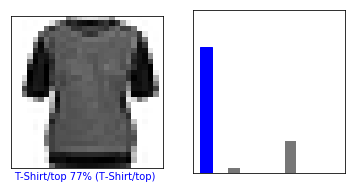

In [56]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions,  test_labels)

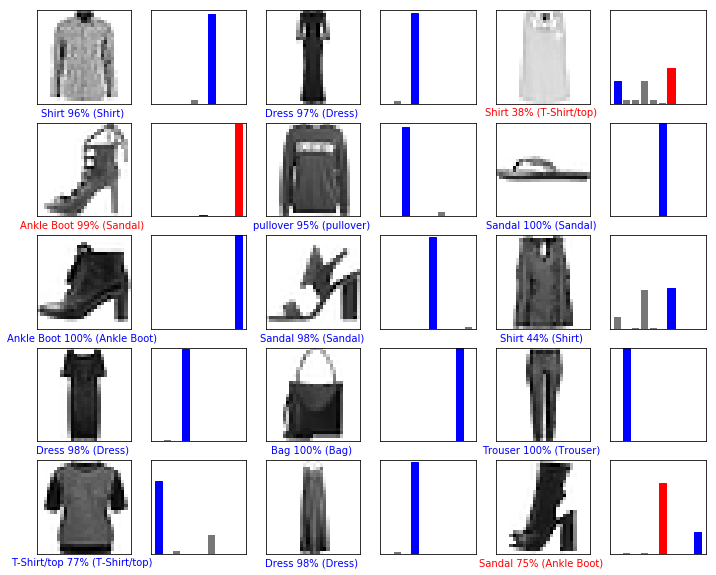

In [57]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)

In [58]:
img=test_images[0]

print(img.shape)

(28, 28, 1)


In [59]:
img=np.array([img])
print(img.shape)

(1, 28, 28, 1)


In [60]:
predictions_single=model.predict(img)
print(predictions_single)

[[4.3964092e-06 3.3736740e-08 1.7655814e-03 4.6073339e-05 4.1227195e-02
  3.4961293e-08 9.5695621e-01 3.0785704e-11 4.3969104e-07 5.0372666e-09]]


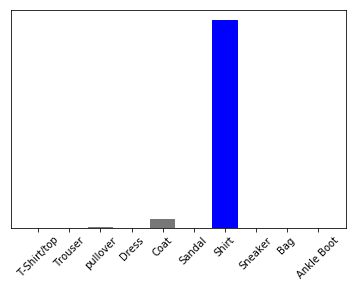

In [63]:
plot_value_array(0,predictions_single,test_labels)
_=plt.xticks(range(10),class_names,rotation=45)

In [64]:
np.argmax(predictions_single[0])

6